# [JSONLoader](https://python.langchain.com/docs/integrations/document_loaders/json/)

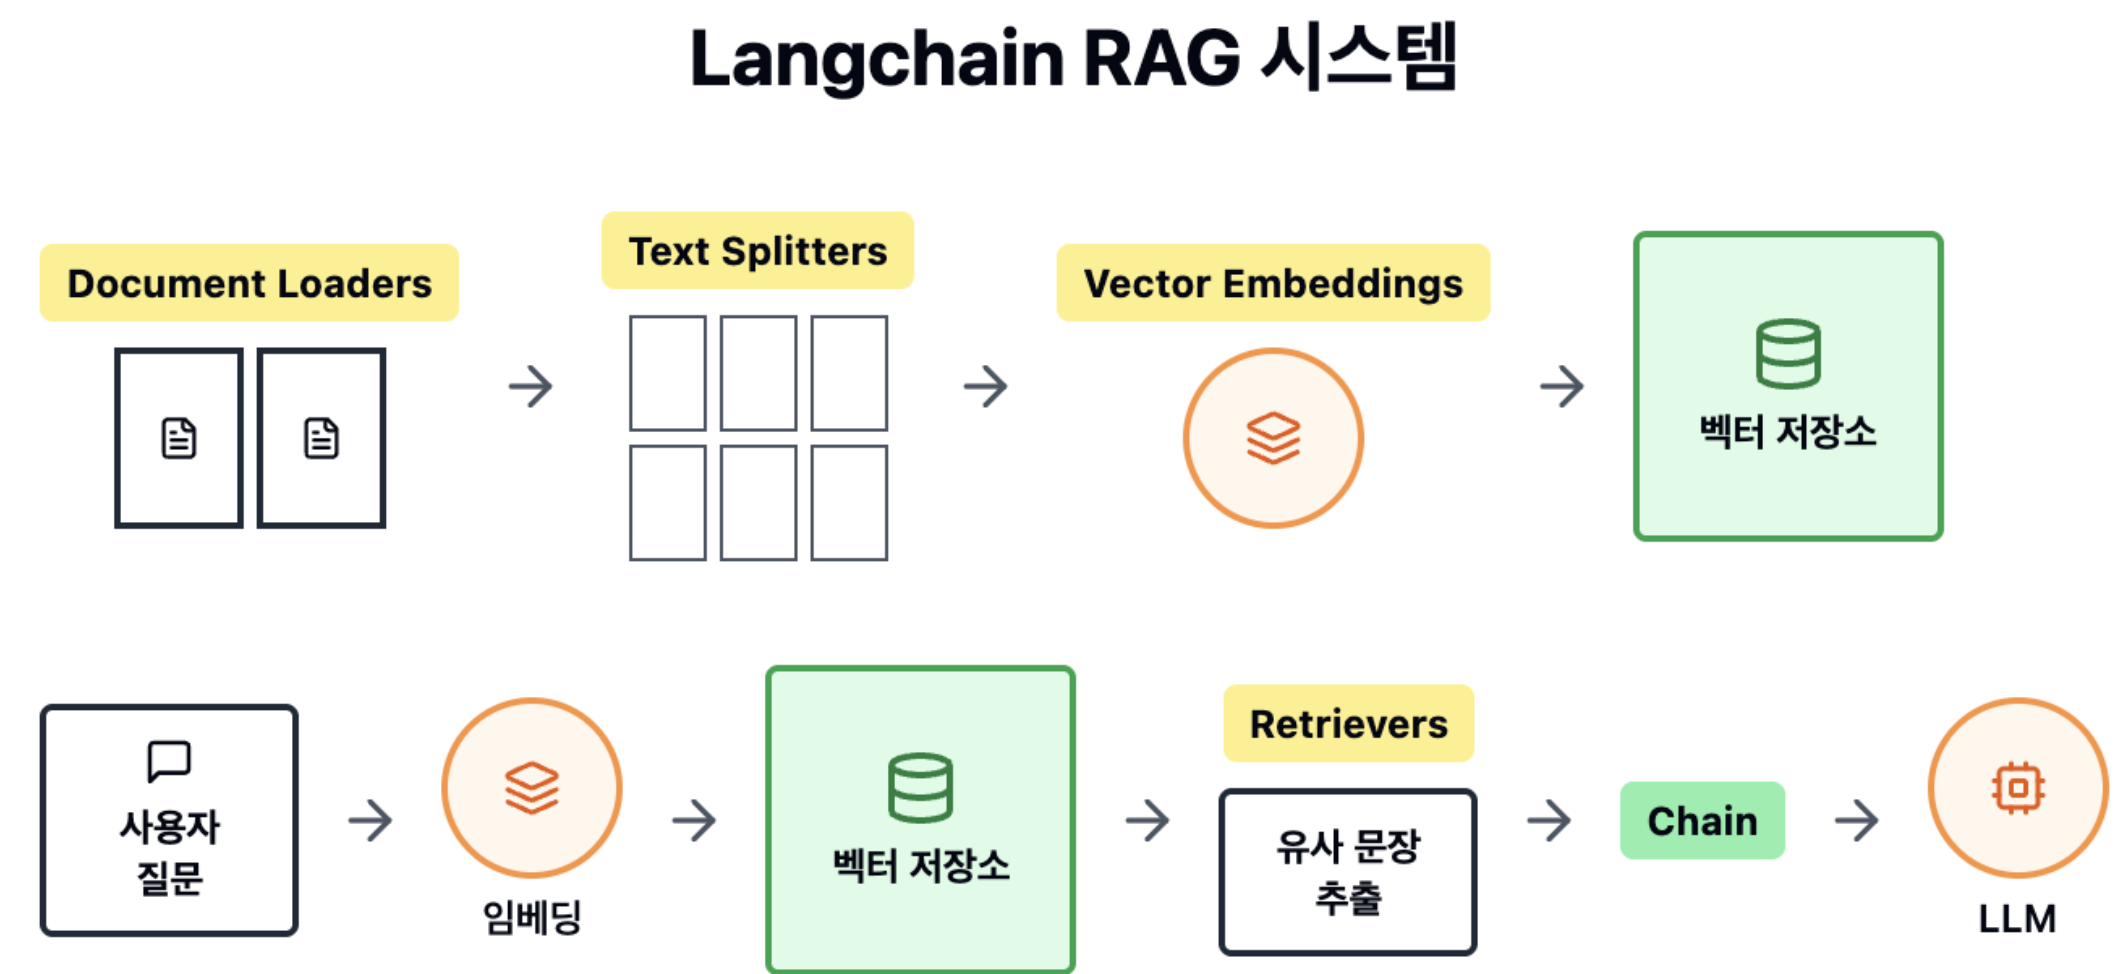

## Json

In [1]:
import json
from pathlib import Path 
from pprint import pprint 

In [2]:
file_path = "./data/sokcho_travel_guide.json"
data = json.load(open(file_path, "r", encoding="utf-8"))

In [3]:
pprint(data)

{'date': '2025-07-15',
 'local_cuisine': [{'description': '속초의 명물! 달콤하고 바삭한 맛이 특징', 'dish': '닭강정'},
                   {'description': '오징어 안에 찹쌀과 채소를 넣어 찐 전통 음식',
                    'dish': '오징어순대'}],
 'location': '강원특별자치도 속초시',
 'tourist_attractions': [{'description': '아름다운 해변과 시원한 바닷바람이 매력적인 명소',
                          'name': '속초해수욕장',
                          'tip': '여름철 피서지로 인기 많음'},
                         {'description': '울산바위, 권금성 등 다양한 명소가 있는 국립공원',
                          'name': '설악산 국립공원',
                          'tip': '트레킹과 자연 풍경 감상에 최적'},
                         {'description': '6.25 전쟁 당시 피난민이 정착한 전통 마을',
                          'name': '아바이마을',
                          'tip': '갯배 체험과 향토 음식 즐기기 가능'}],
 'travel_tips': ['해수욕장과 산을 함께 즐길 수 있는 복합형 여행지',
                 '중앙시장 등지에서 지역 음식을 현지 스타일로 맛볼 수 있음',
                 '아바이마을 갯배 체험은 필수 코스'],
 'weather': {'condition': '맑음', 'humidity': '60%', 'temperature': '25°C'}}


## [Loader 생성하기](https://python.langchain.com/docs/how_to/document_loader_json/)

In [4]:
from langchain_community.document_loaders import JSONLoader

### 예제1

In [5]:
loader = JSONLoader(
    file_path=file_path,
    jq_schema='.tourist_attractions[] | "\(.name): \(.description) (팁: \(.tip))"',
    text_content=False)

documents = loader.load()


<>:3: SyntaxWarning: invalid escape sequence '\('
<>:3: SyntaxWarning: invalid escape sequence '\('
C:\Users\good593\AppData\Local\Temp\ipykernel_8576\854698927.py:3: SyntaxWarning: invalid escape sequence '\('
  jq_schema='.tourist_attractions[] | "\(.name): \(.description) (팁: \(.tip))"',


In [6]:
for i, doc in enumerate(documents):
    print(f"Document {i+1}:")
    print(f"   - 타입: {type(doc)}")
    print(f"   - page_content 타입: {type(doc.page_content)}")
    print(f"   - metadata 타입: {type(doc.metadata)}")
    print(f"   - metadata 내용: {doc.metadata}")
    print(f"   - 내용 길이: {len(doc.page_content)} 문자")
    print(f"   - 내용: {doc.page_content}")


Document 1:
   - 타입: <class 'langchain_core.documents.base.Document'>
   - page_content 타입: <class 'str'>
   - metadata 타입: <class 'dict'>
   - metadata 내용: {'source': 'C:\\develop\\github\\inflearn_LLM\\2. RAG\\jupyter\\data\\sokcho_travel_guide.json', 'seq_num': 1}
   - 내용 길이: 54 문자
   - 내용: 속초해수욕장: 아름다운 해변과 시원한 바닷바람이 매력적인 명소 (팁: 여름철 피서지로 인기 많음)
Document 2:
   - 타입: <class 'langchain_core.documents.base.Document'>
   - page_content 타입: <class 'str'>
   - metadata 타입: <class 'dict'>
   - metadata 내용: {'source': 'C:\\develop\\github\\inflearn_LLM\\2. RAG\\jupyter\\data\\sokcho_travel_guide.json', 'seq_num': 2}
   - 내용 길이: 60 문자
   - 내용: 설악산 국립공원: 울산바위, 권금성 등 다양한 명소가 있는 국립공원 (팁: 트레킹과 자연 풍경 감상에 최적)
Document 3:
   - 타입: <class 'langchain_core.documents.base.Document'>
   - page_content 타입: <class 'str'>
   - metadata 타입: <class 'dict'>
   - metadata 내용: {'source': 'C:\\develop\\github\\inflearn_LLM\\2. RAG\\jupyter\\data\\sokcho_travel_guide.json', 'seq_num': 3}
   - 내용 길이: 57 문자
   - 내용:

### 예제2

In [7]:
loader_name = JSONLoader(
    file_path=file_path,
    jq_schema='.tourist_attractions[].name',
    text_content=False)

loader_desc = JSONLoader(
    file_path=file_path,
    jq_schema='.tourist_attractions[].description',
    text_content=False)

name_docs = loader_name.load()
desc_docs = loader_desc.load()


In [8]:
# 개별 필드 결과 확인
print("=== 관광지 이름 ===")
for i, doc in enumerate(name_docs):
    print(f"{i+1}. {doc.page_content}")

print("\n=== 관광지 설명 ===")
for i, doc in enumerate(desc_docs):
    print(f"{i+1}. {doc.page_content}")


=== 관광지 이름 ===
1. 속초해수욕장
2. 설악산 국립공원
3. 아바이마을

=== 관광지 설명 ===
1. 아름다운 해변과 시원한 바닷바람이 매력적인 명소
2. 울산바위, 권금성 등 다양한 명소가 있는 국립공원
3. 6.25 전쟁 당시 피난민이 정착한 전통 마을


### 예제3

In [9]:
file_path = "./data/facebook_chat.json"
data = json.load(open(file_path, "r", encoding="utf-8"))

pprint(data)

{'image': {'creation_timestamp': 1675549016, 'uri': 'image_of_the_chat.jpg'},
 'is_still_participant': True,
 'joinable_mode': {'link': '', 'mode': 1},
 'magic_words': [],
 'messages': [{'content': 'Bye!',
               'sender_name': 'User 2',
               'timestamp_ms': 1675597571851},
              {'content': 'Oh no worries! Bye',
               'sender_name': 'User 1',
               'timestamp_ms': 1675597435669},
              {'content': 'No Im sorry it was my mistake, the blue one is not '
                          'for sale',
               'sender_name': 'User 2',
               'timestamp_ms': 1675596277579},
              {'content': 'I thought you were selling the blue one!',
               'sender_name': 'User 1',
               'timestamp_ms': 1675595140251},
              {'content': 'Im not interested in this bag. Im interested in the '
                          'blue one!',
               'sender_name': 'User 1',
               'timestamp_ms': 1675595109305},
   

In [10]:
def metadata_func(record: dict, metadata: dict) -> dict:
  metadata["title"] = record.get("title", "")
  metadata["thread_path"] = record.get("thread_path", "")
  metadata["participants"] = [attraction["name"] for attraction in record.get("participants", [])]
  return metadata

In [ ]:
loader_desc = JSONLoader(
    file_path=file_path,
    jq_schema='.',
    text_content=False,
    metadata_func=metadata_func)

docs = loader_desc.load()

In [14]:
docs[0].metadata

{'source': 'C:\\develop\\github\\inflearn_LLM\\2. RAG\\jupyter\\data\\facebook_chat.json',
 'seq_num': 1,
 'title': 'User 1 and User 2 chat',
 'thread_path': 'inbox/User 1 and User 2 chat',
 'participants': ['User 1', 'User 2']}

In [13]:
for i, doc in enumerate(docs):
    print(f"Document {i+1}:")
    print(f"   - 타입: {type(doc)}")
    print(f"   - page_content 타입: {type(doc.page_content)}")
    print(f"   - metadata 타입: {type(doc.metadata)}")
    print(f"   - metadata 내용: {doc.metadata}")
    print(f"   - 내용 길이: {len(doc.page_content)} 문자")
    print(f"   - 내용: {doc.page_content}")

Document 1:
   - 타입: <class 'langchain_core.documents.base.Document'>
   - page_content 타입: <class 'str'>
   - metadata 타입: <class 'dict'>
   - metadata 내용: {'source': 'C:\\develop\\github\\inflearn_LLM\\2. RAG\\jupyter\\data\\facebook_chat.json', 'seq_num': 1, 'title': 'User 1 and User 2 chat', 'thread_path': 'inbox/User 1 and User 2 chat', 'participants': ['User 1', 'User 2']}
   - 내용 길이: 1548 문자
   - 내용: {"image": {"creation_timestamp": 1675549016, "uri": "image_of_the_chat.jpg"}, "is_still_participant": true, "joinable_mode": {"link": "", "mode": 1}, "magic_words": [], "messages": [{"content": "Bye!", "sender_name": "User 2", "timestamp_ms": 1675597571851}, {"content": "Oh no worries! Bye", "sender_name": "User 1", "timestamp_ms": 1675597435669}, {"content": "No Im sorry it was my mistake, the blue one is not for sale", "sender_name": "User 2", "timestamp_ms": 1675596277579}, {"content": "I thought you were selling the blue one!", "sender_name": "User 1", "timestamp_ms": 1675595140